# 

# 物体トラッキング
トラッキング対象を指定(bboxを渡す)することで、対象のbboxを取得するサンプルコード

- 使用した動画
  - https://pixabay.com/ja/videos/%E3%83%88%E3%83%A9%E3%83%99%E3%83%AB-%E9%81%93-%E8%BB%8A-%E9%A2%A8%E6%99%AF-47901/
- 参考リンク
  - OpenCV Object Tracking
    - 物体トラッキングの実装方法をコードブロック単位で解説しているサイト(英語)
    - https://www.pyimagesearch.com/2018/07/30/opencv-object-tracking/


In [36]:
from pathlib import Path
import cv2
import sys
import os

sys.path.append(str(Path(os.getcwd()).parents[1] / 'src'))
from lib.image import Video, draw_bbox, plt_imshow


In [37]:
# 動画の読み込み
cwd = Path(os.getcwd())
video_path = cwd / 'car_driving.mp4'
video = Video(video_path)

print(video.confs)

{'frame_width': 640.0, 'frame_height': 360.0, 'fps': 29.97002997002997, 'frame_count': 613, 'pos_frames': 0, 'pos_msec': 0.0}


In [ ]:
# トラッキング対象を指定
init_bbox = [380,225,72,75] # 手動で初期位置を確認
bboxes = []
bboxes.append(init_bbox)
init_frame = video.read_frame_as_array(0)

img_box = draw_bbox(init_frame, bboxes[0], clr=(0,0,255), thickness=2)
plt_imshow(img_box, is_bgr=True)

(379, 223, 73, 76)
(333, 182, 48, 50)
(356, 203, 39, 41)


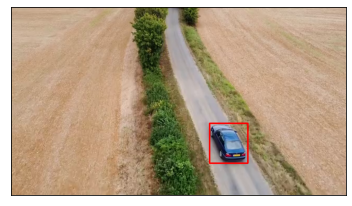

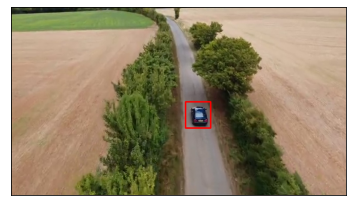

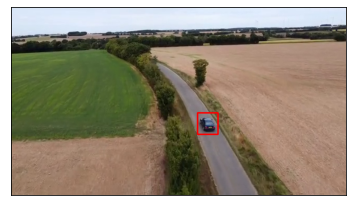

In [45]:
# トラッキング
tracker = cv2.TrackerCSRT_create()
tracker.init(init_frame, init_bbox) # トラッキングの初期設定

# フレームを読み込み、トラッキング
for id_frame in range(1,video.confs['frame_count']-100):
    frame = video.read_frame_as_array(id_frame) # 動画読み込み
    is_valid_bbox, bbox = tracker.update(frame) # トラッキング
    bboxes.append(bbox)

    # bboxを描画
    img_box = draw_bbox(frame, bbox, clr=(0,0,255), thickness=2)

    # トラッキング状況を確認
    if (id_frame % 200) == 1:
        plt_imshow(img_box, is_bgr=True)
        print(bbox)